In [1]:
import pandas as pd
import seaborn as sns
import jsonlines
import os
import matplotlib.pyplot as plt

from src.toolkit.process_results import extract_results

In [2]:
dataframes = extract_results("/DATA/ocl_survey/er_split_cifar100_20_2000")

/DATA/ocl_survey/er_split_cifar100_20_2000/3/logs.json
training
/DATA/ocl_survey/er_split_cifar100_20_2000/3/logs_continual.json
continual
/DATA/ocl_survey/er_split_cifar100_20_2000/4/logs.json
training
/DATA/ocl_survey/er_split_cifar100_20_2000/4/logs_continual.json
continual
/DATA/ocl_survey/er_split_cifar100_20_2000/2/logs.json
training
/DATA/ocl_survey/er_split_cifar100_20_2000/2/logs_continual.json
continual
/DATA/ocl_survey/er_split_cifar100_20_2000/0/logs.json
training
/DATA/ocl_survey/er_split_cifar100_20_2000/0/logs_continual.json
continual
/DATA/ocl_survey/er_split_cifar100_20_2000/0/linear_probing/logs.json
probing
/DATA/ocl_survey/er_split_cifar100_20_2000/1/logs.json
training
/DATA/ocl_survey/er_split_cifar100_20_2000/1/logs_continual.json
continual


In [3]:
df_continual = dataframes["continual"]
df_training = dataframes["training"]
df_probing = dataframes["probing"]

In [12]:
print(df_training["Top1_Acc_Stream/eval_phase/test_stream/Task000"].dropna())

710      0.616000
1421     0.462000
2132     0.401333
2843     0.450500
3554     0.357600
           ...   
68255    0.318125
68966    0.325765
69677    0.305444
70388    0.310421
71099    0.304600
Name: Top1_Acc_Stream/eval_phase/test_stream/Task000, Length: 100, dtype: float64


/tmp/ipykernel_16075/2293843559.py:4: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  final_test_acc = df_training.groupby("mb_index").agg(["mean", "std"])["Top1_Acc_Stream/eval_phase/test_stream/Task000"]
/tmp/ipykernel_16075/2293843559.py:8: FutureWarning: ['name'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  final_probing = df_probing.groupby("mb_index").agg(["mean", "std"])["Top1_Acc_Stream/eval_phase/test_stream/Task000"]


(0.1, 0.8)

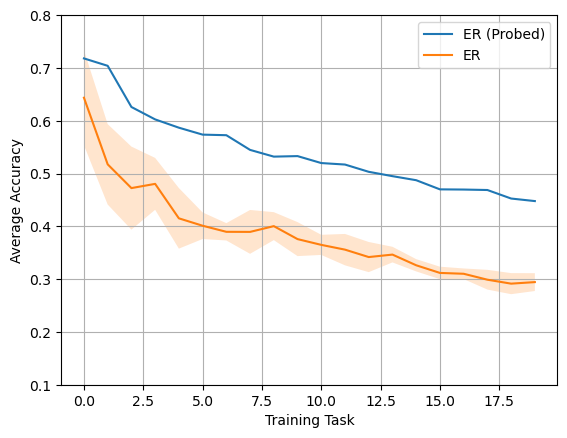

In [60]:
# This computes the test accuracy curves, one point after each experience
# the frame is reindexed so that it can match the curve of probing

final_test_acc = df_training.groupby("mb_index").agg(["mean", "std"])["Top1_Acc_Stream/eval_phase/test_stream/Task000"]
final_test_acc["training_task"] = final_test_acc.index.argsort()
final_test_acc = final_test_acc.fillna(0)

final_probing = df_probing.groupby("mb_index").agg(["mean", "std"])["Top1_Acc_Stream/eval_phase/test_stream/Task000"]
final_probing["training_task"] = final_probing.index.argsort()
final_probing = final_probing.fillna(0)

sns.lineplot(data=final_probing, x="training_task", y="mean", label="ER (Probed)")

plt.fill_between(final_probing['training_task'], final_probing['mean'] - final_probing['std'], final_probing['mean'] + final_probing['std'], alpha=0.2)

sns.lineplot(data=final_test_acc, x="training_task", y="mean", label="ER")

plt.fill_between(final_test_acc['training_task'], final_test_acc['mean'] - final_test_acc['std'], final_test_acc['mean'] + final_test_acc['std'], alpha=0.2)

plt.ylabel("Average Accuracy")
plt.xlabel("Training Task")
plt.grid()
plt.ylim(0.1, 0.8)

<AxesSubplot: xlabel='mb_index', ylabel='Top1_Acc_Stream/eval_phase/test_stream/Task000'>

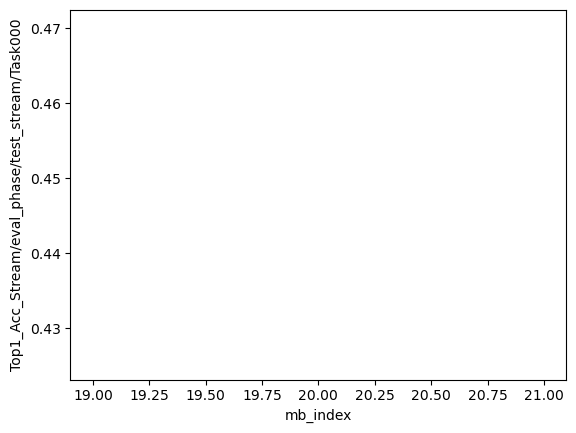

In [16]:
#sns.lineplot(data=df_training, x="mb_index", y="Top1_Acc_Stream/eval_phase/test_stream/Task000", errorbar="sd")
sns.lineplot(data=df_probing, x="mb_index", y="Top1_Acc_Stream/eval_phase/test_stream/Task000", errorbar="sd")